In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X = iris.data[:,(2,3)] #petal length, petal width
y = (iris.target == 0).astype(np.int) #iris setosa?

In [3]:
per_clf = Perceptron()
per_clf.fit(X,y)

Perceptron()

In [4]:
y_pred = per_clf.predict([[2,0.5]])
print(y_pred)

[0]


## Using Perceptron for logical functions

In [5]:
import numpy as np

def unit_step(v):
    """ Heavyside Step Function. v must be scalar"""
    if v >= 0:
        return 1
    else:
        return 0
    
def perceptron(x,w,b):
    """ Function implemented by a perceptron with 
    weight vector w and bias b"""
    
    v = np.dot(w , x) + b
    y = unit_step(v)
    return y


### NOT Gate

In [6]:
def NOT_percept(x):
    return perceptron(x,w = -1, b = 0.5)


""" heavyside step function (- 1 * 0 + 0.5) == 1"""
print("NOT(0) = {}".format(NOT_percept(0)))


""" heavyside step function (1 * -1 + 0.5) == 0"""
print("NOT(1) = {}".format(NOT_percept(1)))

NOT(0) = 1
NOT(1) = 0


### AND Gate

$y = \theta(w_1 * x_1 + w_2 * x_2 + b)$

Choose parameter $ w_1, w_2, b$ properly. 
$w_1 = 1, w_2 = 1, b = -1.5$

In [7]:
def AND_percept(x):
    w = np.array([1,1])
    b = -1.5
    return perceptron(x,w,b)

# Test
example1 = np.array([0,0])
example2 = np.array([0,1])
example3 = np.array([1,0])
example4 = np.array([1,1])

print("AND({}, {}) = {}".format(0, 0, AND_percept(example1)))
print("AND({}, {}) = {}".format(0, 1, AND_percept(example2)))
print("AND({}, {}) = {}".format(1, 0, AND_percept(example3)))
print("AND({}, {}) = {}".format(1, 1, AND_percept(example4)))

AND(0, 0) = 0
AND(0, 1) = 0
AND(1, 0) = 0
AND(1, 1) = 1


### OR gate

$ w1 = 1, w2 = 1, b = -0.5 $

In [8]:
def OR_percept(x):
    w = np.array([1,1])
    b = -0.5
    return perceptron(x,w,b)

# Test
example1 = np.array([0,0])
example2 = np.array([0,1])
example3 = np.array([1,0])
example4 = np.array([1,1])

print("OR({}, {}) = {}".format(0, 0, OR_percept(example1)))
print("OR({}, {}) = {}".format(0, 1, OR_percept(example2)))
print("OR({}, {}) = {}".format(1, 0, OR_percept(example3)))
print("OR({}, {}) = {}".format(1, 1, OR_percept(example4)))

OR(0, 0) = 0
OR(0, 1) = 1
OR(1, 0) = 1
OR(1, 1) = 1


### XOR Gate

Xor gate can be made from combination of 3 gates mentioned above

$ XOR(x_1,x_2) = AND(NOT(AND(x_1,x_2)), OR(x_1,x_2)) $



In [9]:
def XOR_net(x):
    gate1 = AND_percept(x)
    gate2 = OR_percept(x)
    gate3 = NOT_percept(gate1)
    
    new_x = np.array([gate2,gate3])
    
    output = AND_percept(new_x)
    return output
    
# Test
example1 = np.array([0,0])
example2 = np.array([0,1])
example3 = np.array([1,0])
example4 = np.array([1,1])

    
print("XOR({}, {}) = {}".format(0, 0, XOR_net(example1)))
print("XOR({}, {}) = {}".format(0, 1, XOR_net(example2)))
print("XOR({}, {}) = {}".format(1, 0, XOR_net(example3)))
print("XOR({}, {}) = {}".format(1, 1, XOR_net(example4)))

XOR(0, 0) = 0
XOR(0, 1) = 1
XOR(1, 0) = 1
XOR(1, 1) = 0


This is the result we're looking for. We combined 3 perceptrons above to get a more complex logical function. 

So, **is it possible to do the same like before (by finding the paraemters w and b?**. NO, because they don't exist. **WHY?**. The answer is that the XOR problem is not **Linearly Seperable**. 


**Hence, the limitation of perceptrons can be eliminated by stacking multiple perceptrons**. The resulting ANN is called **Multi-Layer Perceptron (MLP).** 

An MLP is composed of one (passthrough) input layer, one or more layers of TLUs, called hidden layers, and one final layer of TLUs called the output layers. 

When an ANN contains a deep stack of hidden layers, it is called **deep neural network(DNN)**. 

## Training multi layer perceptron (ANN)

-> trained using backward propagation algorithm.   

-> performs gradient descent step. 

##### Algorithm in more detail:
- handles one mini-batch at a time (for example 32 instances each) and goes through the full training set multiple times. 

- each mini-batch is passed to the network input layer, which sends it to hidden layer and so on. Hence, we get the output. This is known as **forward pass**. It is exactly like making predictions, except all intermediate results are preserved since they are needed for backward pass. 

- Next, algorithm measures the network's output error (using loss function).  Compares desired output with network output. 

- Then it computes how much each output connection contributed to the error. Done analytically by chain rule of calculus. It does so until it reaches input layer. 

- Finally, the algorithm performs gradient descent step to tweak all the connection weights.  


In order for this algorithm to work properly, the authors made a key change to the MLP architecture's step function with the logistic sigmoid function. $\sigma(z) = \frac{1}{1 - \exp(-z)}$. This was essential because the step function contains only the flat segments, so there is no gradient to work with, while logistic function has a well defined non zero derivative every wehere, allowing gradient descent to make progress at every step. 


#### Now we know where Neural net came from, what exactly we can do with them? 

#### 1) Regression MLPs:
If you want to predict a single value (eg: price of house given many features) then you just need single output neuron. 
If you want to locate the center of an object on an image, you need to predict 2D coordinates, so you need two output neurons. .. and so on. 

In general, if you want to use MLPs for regression task, you should not use activation function for the output neurons, so they are free to output any range of values. 

#### 2) Classification MLPs:
MLPs also does classification tasks. For binary classification, you just need one output neuron using the logistic activation function. You can also use it for multilabel binary classification. eg. predicting email is ham or spam, and urgent or non-urgent. For this you need two output neuron. 

You can also use it for multiclass classification. Eg: Classifying MNIST dataset, for 0 to 9 digit, you need 10 output neurons, and you should use softmax activation function for whole output layer. (Softmax activation function basically assigns probability for whole output neurons, s.t their sum altogether is 1)

## Building an Image classifier using Sequential API

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [12]:
# every image is represented as 28 x 28 array rather than 1D array size of 784
print(X_train_full.shape)
print(X_train_full.dtype)
# There are 60000 dataset 

(60000, 28, 28)
uint8


In [13]:
# Create a validation set. and, since we are going to train using gradient descent, we must scale the input feature
# For simplicity, divide by 255.0 to scale them in range 0-1.

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [14]:
# the class names for y are:
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat",
              "Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

class_names[y_train[0]]

'Coat'

In [15]:
# Now creating model using sequential API

# Sequential model -> simplest kind of keras model composed of single stack of layers connected sequentially.
model = keras.models.Sequential()

# first layer Flatten layer whose role is simply to convert each iput image to 1D array. Like X.reshape(-1,1)
# Alternatively, you could also do -> model.add(keras.layers.InputLayer(shape = [28,28]))
model.add(keras.layers.Flatten(input_shape = [28,28]))

# Add Dense hidden layer with 300 neuron && 100 neuron, and it will use ReLU activation
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(100,activation = "relu"))

#Finally, we add Dense output layer with 10 neuron (one per class) using softmax activation function.
model.add(keras.layers.Dense(10,activation = "softmax"))

In [16]:
# print model description
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Dense layer often has lot of parameters. For example first hidden layer has 784 x 300 parameters + 300 bias terms which adds up to 235,500. This gives the model quite a lot of flexibility to fit the training data, but also means model runs the risk of overfitting, especially when you donot have a lot of training data. 

In [17]:
# print model layers. 
model.layers

print(model.layers[0].name)
print(model.layers[1].name)
print(model.layers[2].name)
print(model.layers[3].name)

flatten
dense
dense_1
dense_2


All the parameters of a layer can be accessed using its get_weights() and set_weights() method. For a dense layer, this includes both the connection weights and bias terms. 

In [18]:
hidden1 = model.layers[1]
weights,biases = hidden1.get_weights()
print("Weights:\r\n",weights)
print("\r\n")
print("Weight shape:",weights.shape)

Weights:
 [[ 0.04958864 -0.04779727  0.00687333 ... -0.06269519  0.06484419
   0.05254701]
 [ 0.04169325  0.04855789 -0.01027607 ...  0.04412204 -0.0452532
  -0.06192764]
 [-0.04971872  0.05804987 -0.01706743 ... -0.013877   -0.04367473
  -0.01593555]
 ...
 [ 0.00556499  0.03387158  0.01763874 ... -0.01227954 -0.04701785
   0.0401414 ]
 [ 0.00731344 -0.05915475  0.0690787  ...  0.01081468  0.04263622
   0.00148878]
 [-0.00412194 -0.07362765  0.03361884 ...  0.061204   -0.06167354
   0.00611348]]


Weight shape: (784, 300)


In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
# After a model is created, you must call its compile() method to specify the loss function and the optimizer
# to use. 
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

# we used sgd optimizer i.e train the model using sgd. 
# Finally since this is classifier, it's useful to measure its "accuracy" during training and evaluation. 

In [21]:
X_train.shape
# Although there are 55000 data, in epochs below, 1719 images are processed. This is because the default batch
# size is 32. i.e mean loss of 32 images are calculated at once. and weights are adjusted. 
# 55000 / 32 = 1719

(55000, 28, 28)

In [22]:
# Training and evaluating model

history = model.fit(X_train,y_train,epochs = 30,
                   validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7344 - accuracy: 0.7588 - val_loss: 0.5360 - val_accuracy: 0.8096
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4937 - accuracy: 0.8281 - val_loss: 0.4572 - val_accuracy: 0.8434
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4482 - accuracy: 0.8441 - val_loss: 0.4203 - val_accuracy: 0.8554
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4195 - accuracy: 0.8525 - val_loss: 0.4061 - val_accuracy: 0.8602
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3991 - accuracy: 0.8618 - val_loss: 0.3971 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3841 - accuracy: 0.8643 - val_loss: 0.3725 - val_accuracy: 0.8716
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3692 - accuracy: 0.8711 - val_loss: 0.3627 - val_accuracy:

The fit() method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch) and most importantly a dictionary, (history.history) containing the loss and extra metrics it measured at the end of each epoch on training set and on the validation set (if any). 

If you create a pandas dataframe, you can call its plot() method to get learning curve. 

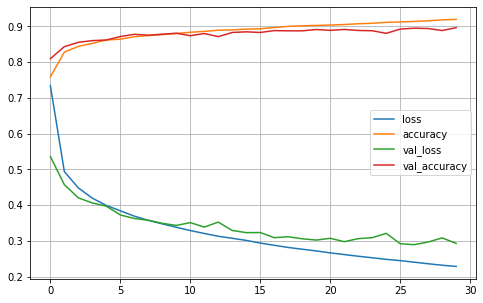

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)

In [24]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 62.7417 - accuracy: 0.8551


[62.74165725708008, 0.8550999760627747]

In [25]:
# Using model to make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [27]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

## Building a Regression MLP using Sequential API

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
housing = fetch_california_housing()

X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state = 42)

In [48]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state = 42)

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

In [51]:
X_train.shape[1:]

(8,)

In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation = "relu",input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
    ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [53]:
print(X_train.shape)
# 1 epoch = 11610 / 32 = 363

(11610, 8)


In [54]:
model.compile(loss = "mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train_scaled,y_train,epochs = 20, validation_data = (X_valid_scaled,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.6419 - val_loss: 0.8077
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7047 - val_loss: 0.6736
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6345 - val_loss: 0.6243
Epoch 4/20
363/363 [==============================] - 0s 997us/step - loss: 0.5977 - val_loss: 0.5977
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5706 - val_loss: 0.5708
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5472 - val_loss: 0.5538
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5288 - val_loss: 0.5370
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5130 - val_loss: 0.5257
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4992 - val_loss: 0.5142
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4875 - val_loss: 0.50

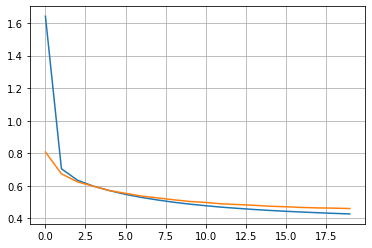

In [55]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)

In [56]:
mse_test = model.evaluate(X_test_scaled,y_test)

162/162 [==============================] - 0s 807us/step - loss: 0.4190


In [57]:
X_new = X_test_scaled[:3]
y_pred = model.predict(X_new)
print(y_pred)

[[0.32761034]
 [1.7185787 ]
 [3.3415675 ]]


As you can see, sequential API is quite easy to use. However, although sequential models are extremely common, it is sometimes useful to build neural networks with more complex topologies, or with multiple input outputs. For this purpose, keras offers functional APIs

## Building Complex Models Using the Functional API

One example of non-sequential neural network is *Wide and Deep neural network*. It connects all or part of inputs directly to the output later. This architecture makes it possible for the neural network to learn both deep patterns (using deep path) and simple rules (through short path). Let's build such neural network to tackle the housing dataset above

In [58]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state = 42)

X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state = 42)

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

In [60]:
# First creating input object. This is needed because we may have multiple inputs
input = keras.layers.Input(shape = X_train.shape[1:])

# Dense layer with 30 neurons. As soon as it is created, we pass input. This is functional API
hidden1 = keras.layers.Dense(30,activation = 'relu')(input)

# 2nd Dense layer with 30 neurons. again use it as function
hidden2 = keras.layers.Dense(30,activation = "relu")(hidden1)

# concatenate layer to concatenate input and output of the second hidden layer. 
concat = keras.layers.Concatenate()([input,hidden2])

# output layer with single  neuron 
output = keras.layers.Dense(1)(concat)


model = keras.models.Model(inputs = [input],outputs = [output])


In [61]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           930         dense_10[0][0]                   
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_2[0][0]                    
                                                                 dense_11[0][0]        

In [62]:
model.compile(loss = "mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
model.fit(X_train_scaled,y_train,epochs = 20, validation_data = (X_valid_scaled,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2611 - val_loss: 0.7115
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6580 - val_loss: 0.6351
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5878 - val_loss: 0.5926
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5582 - val_loss: 0.5727
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5347 - val_loss: 0.5501
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5158 - val_loss: 0.5337
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5002 - val_loss: 0.5209
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4876 - val_loss: 0.5110
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4760 - val_loss: 0.4997
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4659 - val_loss: 0.4907

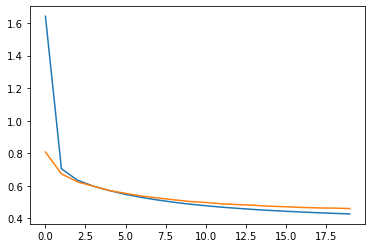

In [63]:
plt.plot(pd.DataFrame(history.history))
plt.show()

In [66]:
mse_test = model.evaluate(X_test_scaled,y_test)
X_new = X_test_scaled[:3]
y_pred = model.predict(X_new)
print(y_pred)

162/162 [==============================] - 0s 794us/step - loss: 0.4122
[[0.3919998]
 [1.9343274]
 [3.6921172]]


## Multiple Input
What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4) through wide path, and 6 features through the deep path. (features 2 to 7)

In [71]:
input_A = keras.layers.Input(shape = [5],name = "wide_input")
input_B = keras.layers.Input(shape = [6],name = "deep_input")
hidden1 = keras.layers.Dense(30,activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30,activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_A,input_B],outputs = [output])

In [72]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 30)           930         dense_14[0][0]                   
_______________________________________________________________________________________

In [73]:
model.compile(loss = "mse",optimizer = "sgd")

In [75]:
# Prepare data to pass through model
X_train_A,X_train_B = X_train_scaled[:,:5],X_train_scaled[:,2:]
X_valid_A,X_valid_B = X_valid_scaled[:,:5],X_valid_scaled[:,2:]
X_test_A,X_test_B = X_test_scaled[:,:5],X_test_scaled[:,2:]
X_new_A,X_new_B = X_test_A[:3],X_test_B[:3]

In [76]:
history = model.fit((X_train_A,X_train_B),y_train,epochs = 20,
                    validation_data = ((X_valid_A,X_valid_B),y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7335 - val_loss: 0.5095
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4801 - val_loss: 0.4708
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4519 - val_loss: 0.4803
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4283 - val_loss: 0.7056
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4191 - val_loss: 0.4510
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4039 - val_loss: 0.5124
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4086 - val_loss: 0.4503
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3918 - val_loss: 0.4559
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3857 - val_loss: 0.4527
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3825 - val_loss: 0.4451

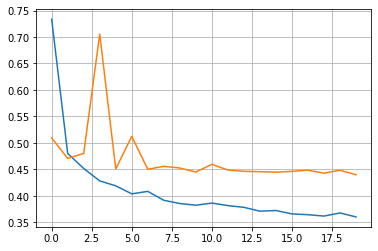

In [78]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)

In [80]:
mse_test = model.evaluate((X_test_A,X_test_B),y_test)
y_pred = model.predict((X_new_A,X_new_B))
print(y_pred)

162/162 [==============================] - 0s 1ms/step - loss: 0.4063
[[0.43741655]
 [1.690215  ]
 [4.2978745 ]]


## Multiple Output

There are also many use cases in which you may want to have multiple output. 
- If you want to **locate** and **classify** the main object in a picture. This is both a regression task and classification task.

- When you have multiple independent tasks to perform based on the same data. 

- As a regularization technique (i.e training constraint whose objective is to reduce overfitting and thus improve the model's ability to generalize)


For adding extra output, connect them to the appropriate layers and add them to your model's list of outputs. 

In [89]:
input_A = keras.layers.Input(shape = [5],name = "wide_input")
input_B = keras.layers.Input(shape = [6],name = "deep_input")
hidden1 = keras.layers.Dense(30,activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30,activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name = "Main_output")(concat)
aux_output = keras.layers.Dense(1,name = "Aux_output")(hidden2)

model = keras.models.Model(inputs = [input_A,input_B],outputs = [output,aux_output])

In [90]:
model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 30)           930         dense_23[0][0]                   
_______________________________________________________________________________________

In [91]:
# if we pass single "mse", mse will be used for both output
model.compile(loss = ["mse","mse"], loss_weights = [0.9,0.1],optimizer = "sgd")
# Keras will compute losses and add simply add them to get final loss. 
# if we care much more about main output then aux output then, we assign
# weights accordingly

In [92]:
history = model.fit(
    [X_train_A,X_train_B],[y_train,y_train],epochs = 20,
    validation_data = ([X_valid_A,X_valid_B],[y_valid,y_valid])
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8447 - Main_output_loss: 0.7632 - Aux_output_loss: 1.5784 - val_loss: 0.5905 - val_Main_output_loss: 0.5413 - val_Aux_output_loss: 1.0334
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5296 - Main_output_loss: 0.4920 - Aux_output_loss: 0.8681 - val_loss: 0.5445 - val_Main_output_loss: 0.5135 - val_Aux_output_loss: 0.8235
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4824 - Main_output_loss: 0.4529 - Aux_output_loss: 0.7478 - val_loss: 0.4955 - val_Main_output_loss: 0.4679 - val_Aux_output_loss: 0.7440
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4415 - Main_output_loss: 0.4161 - Aux_output_loss: 0.6700 - val_loss: 0.4931 - val_Main_output_loss: 0.4694 - val_Aux_output_loss: 0.7062
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4298 - Main_output_loss: 0.4075 - Aux_output_loss: 0.6301 - val_loss

In [93]:
total_loss,main_loss,aux_loss = model.evaluate([X_test_A,X_test_B],[y_test,y_test])

162/162 [==============================] - 0s 777us/step - loss: 0.4244 - Main_output_loss: 0.4076 - Aux_output_loss: 0.5758


In [95]:
print(main_loss)
print(aux_loss)
print(total_loss)

0.40762612223625183
0.5757866501808167
0.4244421720504761


In [97]:
y_pred_main,y_pred_aux = model.predict([X_new_A,X_new_B])
print(y_pred_main)
print(y_pred_aux)

[[0.53341085]
 [1.949464  ]
 [4.278716  ]]
[[0.62737286]
 [2.263744  ]
 [4.2259927 ]]


## The Subclassing API (For dynamic models)

In [113]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self,units = 30,activation = "relu",**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units,activation = activation)
        self.hidden2 = keras.layers.Dense(units,activation = activation)
        self.main_output = keras.layers.Dense(1,name = "main_output")
        self.aux_output = keras.layers.Dense(1,name = "aux_output")
        
    def call(self,inputs):
        input_A,input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A,hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output,aux_output
    
model = WideAndDeepModel()

In [114]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.2231 - output_1_loss: 2.0005 - output_2_loss: 4.2267 - val_loss: 1.0602 - val_output_1_loss: 0.8303 - val_output_2_loss: 3.1295
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.9109 - output_1_loss: 0.7164 - output_2_loss: 2.6613 - val_loss: 0.8413 - val_output_1_loss: 0.6955 - val_output_2_loss: 2.1541
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7703 - output_1_loss: 0.6407 - output_2_loss: 1.9365 - val_loss: 0.7551 - val_output_1_loss: 0.6504 - val_output_2_loss: 1.6978
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7006 - output_1_loss: 0.6039 - output_2_loss: 1.5708 - val_loss: 0.7090 - val_output_1_loss: 0.6262 - val_output_2_loss: 1.4538
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6555 - output_1_loss: 0.5761 - output_2_loss: 1.3703 - val_loss: 0.6716 - val_output_1_loss: 0.5989 - val_ou

The example looks very much like Functional API, except we do not need to create the inputs, we just use the input argument to call() method, and we separate the creation of layers in the constructor from their usage in the call() method.

you can do anything you like with call statements. for loops, while, if statements, etc. This is great for experimenting with new ideas. 


However, your model's architecture is hidden within the call() function, so keras cannot easily inspect it, it cannot save or clone it, and when you call summary() method, you only get a list of layers, without any information on how they are connected to each other. 

In [115]:
model.summary()

Model: "wide_and_deep_model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             multiple                  210       
_________________________________________________________________
dense_42 (Dense)             multiple                  930       
_________________________________________________________________
main_output (Dense)          multiple                  36        
_________________________________________________________________
aux_output (Dense)           multiple                  31        
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


## Saving and restoring a model

In [116]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])



model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test, y_test)



Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 1.8866 - val_loss: 0.7414
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6221
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - val_loss: 0.5779
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5557 - val_loss: 0.5572
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - val_loss: 0.5305
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - val_loss: 0.5113
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - val_loss: 0.4974
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4709 - val_loss: 0.4903
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4578 - val_loss: 0.4773
Epoch 10/10
162/162 [==============================] - 0s 673us/step - loss: 50316.0156


In [117]:
# saving weights.
model.save_weights("my_keras_weights.ckpt")
# saving model.
model.save("my_keras_mode.h5")

You will typically have a script that trains a model and saves it. But what if the training lasts for hours? This is quite common, especially when training on large datasets. In this case, you should not only save your model at the end of training, but also save checkpoints at regular intervals during training. You can do this by using **Callbacks**.

## Using Callbacks during Training.

In [122]:
keras.backend.clear_session()

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [124]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only = True)
# save best only true means it will only save your model when its performance on validation
# set is the best so far. 
history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4393 - val_loss: 0.4655
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4315 - val_loss: 0.4627
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4259 - val_loss: 0.4562
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4201 - val_loss: 0.4554
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4154 - val_loss: 0.4506
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4111 - val_loss: 0.4461
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4074 - val_loss: 0.4446
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4040 - val_loss: 0.4434
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4008 - val_loss: 0.4391
Epoch 10/10
162/162 [==============================] - 0s 722us/step - loss: 24681.2285


Another way to implement early stopping is to use EarlyStopping callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by patience argument), and it will optionally roll back to the best model. 

In [125]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

history = model.fit(X_train_scaled, y_train, epochs=100,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

# The number of epochs can be set to a large value since training will stop automatically when there is no more progress. 
mse_test = model.evaluate(X_test,y_test)


Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3949 - val_loss: 0.4344
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3923 - val_loss: 0.4354
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3898 - val_loss: 0.4317
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3873 - val_loss: 0.4311
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3851 - val_loss: 0.4287
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3829 - val_loss: 0.4266
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3808 - val_loss: 0.4262
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3788 - val_loss: 0.4252
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3768 - val_loss: 0.4231
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3749 - val_lo

In [126]:
# If you need extra control, you can write your custom callbacks.
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"]/logs["loss"]))

In [129]:

val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train_scaled,y_train,epochs = 1,
                   validation_data = (X_valid_scaled,y_valid),
                   callbacks = [val_train_ratio_cb])

343/363 [===========================>..] - ETA: 0s - loss: 0.3358
val/train: 1.20
363/363 [==============================] - 0s 1ms/step - loss: 0.3384 - val_loss: 0.4052


## Visualization using Tensorboard

In [132]:
import os
import time
root_logdir = os.path.join(os.curdir,"my_logs")

In [133]:
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d - %H_%M_%S")
    return os.path.join(root_logdir,run_id)

run_logdir = get_run_logdir()
print(run_logdir)

./my_logs/run_2021_05_20 - 09_24_13


In [134]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [135]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [137]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train_scaled, y_train, epochs = 30,
                   validation_data = (X_valid_scaled,y_valid),
                   callbacks = [checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3731 - val_loss: 0.4204
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3714 - val_loss: 0.4214
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3700 - val_loss: 0.4198
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3685 - val_loss: 0.4185
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3671 - val_loss: 0.4182
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3658 - val_loss: 0.4171
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3646 - val_loss: 0.4173
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3635 - val_loss: 0.4163
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3624 - val_loss: 0.4154
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3612 - val_loss: 0.4146



To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```$ tensorboard --logdir=./my_logs --port=6006```

You can then open your web browser to localhost:6006 and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:


In [138]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 34236), started 0:00:50 ago. (Use '!kill 34236' to kill it.)

In [139]:
run_logdir2 = get_run_logdir()
run_logdir2


'./my_logs/run_2021_05_20 - 09_33_32'

In [141]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [142]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [143]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train_scaled, y_train, epochs = 30,
                   validation_data = (X_valid_scaled,y_valid),
                   callbacks = [checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5530 - val_loss: 3.4409
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 5292745216.0000 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3411 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3423 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3423 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3431 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3425 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3433 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3435 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3423 - val_los

In [144]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



## Hyperparameter tuning

Flexibility of ANN is also its main drawback. There are many hyperparameters to tweak. 
How do you know what combination of hyperparameters is best for your task?

1) Try many combinations of hyperparameters. Use **RandomizedSearchCV** or **GridSearchCV** to explore the hyperparameter space. For this, we nee to wrap our keras models in objects that mimic regular scikit-learn regressors. First step is to build function that will build and compile a keras model. 

In [146]:
def build_model(n_hidden = 1,n_neurons = 30,learning_rate = 3e-3,input_shape = [8]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation = "relu",**options))
        options = {}
    model.add(keras.layers.Dense(1,**options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss = "mse",optimizer = optimizer)
    return model
            

In [147]:
# let's create keras regressor based on this build_model()
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [149]:
keras_reg.fit(X_train_scaled,y_train,epochs = 100,
             validation_data = (X_valid_scaled,y_valid),
             callbacks = [keras.callbacks.EarlyStopping(patience = 10)]
             )
mse_test = keras_reg.score(X_test_scaled,y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 1.1199 - val_loss: 0.7570
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6678 - val_loss: 0.5878
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5200 - val_loss: 0.5456
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4855 - val_loss: 0.5223
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4632 - val_loss: 0.5025
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4478 - val_loss: 0.4908
Epoch 7/100
363/363 [==============================] - 0s 989us/step - loss: 0.4367 - val_loss: 0.4792
Epoch 8/100
363/363 [==============================] - 0s 969us/step - loss: 0.4288 - val_loss: 0.4719
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4220 - val_loss: 0.4635
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4169 - va

We do not actually want to train and evaluate a single model like this. We want to train hundreds of variants and see which one performs best on the validation set. Since there are many hyperparameters, it is preferable to use **randomized search** rather than grid search. 

In [151]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden":[0,1,2,3],
    "n_neurons":np.arange(1,100),
    "learning_rate":reciprocal(3e-4,3e-2),
}


rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train_scaled, y_train, epochs=100,
                  validation_data=(X_valid_scaled, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.00037192261022352417, n_hidden=3, n_neurons=80 ..
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 0s 2ms/step - loss: 2.9763 - val_loss: 1.6290
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3693 - val_loss: 1.0131
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9477 - val_loss: 0.8231
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7983 - val_loss: 0.7350
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7266 - val_loss: 0.6875
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6864 - val_loss: 0.6592
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6593 - val_loss: 0.6352
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6378 - val_loss: 0.6180
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6195 - val_loss: 0.6034
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6026 - val_loss: 0.5902
E

242/242 [==============================] - 0s 1ms/step - loss: 0.3567 - val_loss: 0.4283
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3562 - val_loss: 0.4275
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3556 - val_loss: 0.4271
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3550 - val_loss: 0.4274
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3545 - val_loss: 0.4260
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3537 - val_loss: 0.4271
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3536 - val_loss: 0.4256
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3530 - val_loss: 0.4257
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3525 - val_loss: 0.4256
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3518 - val_loss: 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.1s remaining:    0.0s


242/242 [==============================] - 0s 2ms/step - loss: 4.5724 - val_loss: 2.8102
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 2.0576 - val_loss: 1.4288
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2137 - val_loss: 1.0718
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9441 - val_loss: 0.9013
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8085 - val_loss: 0.7952
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7303 - val_loss: 0.7297
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6823 - val_loss: 0.6860
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6499 - val_loss: 0.6525
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6257 - val_loss: 0.6278
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6059 - val_loss: 0.6072
E

242/242 [==============================] - 0s 1ms/step - loss: 0.3668 - val_loss: 0.4268
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3663 - val_loss: 0.4260
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3656 - val_loss: 0.4274
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3652 - val_loss: 0.4259
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3645 - val_loss: 0.4256
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3639 - val_loss: 0.4249
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3634 - val_loss: 0.4248
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3628 - val_loss: 0.4247
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3623 - val_loss: 0.4250
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3617 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3776 - val_loss: 0.4327
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3765 - val_loss: 0.4312
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3757 - val_loss: 0.4323
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3747 - val_loss: 0.4320
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3739 - val_loss: 0.4300
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3731 - val_loss: 0.4294
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3723 - val_loss: 0.4293
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3713 - val_loss: 0.4299
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3706 - val_loss: 0.4281
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3698 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4080 - val_loss: 0.4565
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4064 - val_loss: 0.4562
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4048 - val_loss: 0.4534
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4034 - val_loss: 0.4543
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4020 - val_loss: 0.4536
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4007 - val_loss: 0.4526
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3995 - val_loss: 0.4507
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3982 - val_loss: 0.4505
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3971 - val_loss: 0.4491
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3959 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4890 - val_loss: 0.5332
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4816 - val_loss: 0.5274
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4750 - val_loss: 0.5208
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4690 - val_loss: 0.5153
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4634 - val_loss: 0.5107
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4586 - val_loss: 0.5073
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4541 - val_loss: 0.5028
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4501 - val_loss: 0.4987
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4463 - val_loss: 0.4944
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4429 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3722 - val_loss: 0.4306
Epoch 96/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3719 - val_loss: 0.4305
Epoch 97/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3714 - val_loss: 0.4286
Epoch 98/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3711 - val_loss: 0.4281
Epoch 99/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3708 - val_loss: 0.4290
Epoch 100/100
121/121 [==============================] - 0s 722us/step - loss: 0.3919
[CV]  learning_rate=0.0008763224455697141, n_hidden=1, n_neurons=47, total=  29.7s
[CV] learning_rate=0.0008763224455697141, n_hidden=1, n_neurons=47 ...
Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 4.0643 - val_loss: 1.6711
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2626 - val_loss: 0.9074
Epoch 3/100
242/242 [==============================] - 0s 1ms

242/242 [==============================] - 0s 1ms/step - loss: 0.3856 - val_loss: 0.4350
Epoch 74/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3851 - val_loss: 0.4353
Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3845 - val_loss: 0.4356
Epoch 76/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3838 - val_loss: 0.4359
Epoch 77/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3834 - val_loss: 0.4347
Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3828 - val_loss: 0.4343
Epoch 79/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3823 - val_loss: 0.4338
Epoch 80/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3817 - val_loss: 0.4349
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3813 - val_loss: 0.4331
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3807 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.2858 - val_loss: 0.4106
Epoch 52/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2848 - val_loss: 0.3968
Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2846 - val_loss: 0.3901
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2826 - val_loss: 0.4049
Epoch 55/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2817 - val_loss: 0.3919
Epoch 56/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2819 - val_loss: 0.3904
Epoch 57/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2798 - val_loss: 0.3950
Epoch 58/100
121/121 [==============================] - 0s 780us/step - loss: 0.3199
[CV]  learning_rate=0.0051747964719537, n_hidden=3, n_neurons=55, total=  19.7s
[CV] learning_rate=0.0051747964719537, n_hidden=3, n_neurons=55 ......
Epoch 1/100
242/242 [==============================] - 0s 2ms/s

242/242 [==============================] - 0s 1ms/step - loss: 0.3264 - val_loss: 0.4031
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3245 - val_loss: 0.4057
Epoch 24/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3228 - val_loss: 0.4038
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3212 - val_loss: 0.3994
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3184 - val_loss: 0.3919
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3167 - val_loss: 0.4005
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3163 - val_loss: 0.4005
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3168 - val_loss: 0.3929
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3158 - val_loss: 0.4032
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3114 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.5128 - val_loss: 0.6848
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5121 - val_loss: 0.5373
Epoch 18/100
242/242 [==============================] - 0s 939us/step - loss: 0.5173 - val_loss: 0.6268
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5145 - val_loss: 0.6831
Epoch 20/100
121/121 [==============================] - 0s 3ms/step - loss: 0.6937
[CV]  learning_rate=0.027770456976200626, n_hidden=0, n_neurons=3, total=   6.4s
[CV] learning_rate=0.027770456976200626, n_hidden=0, n_neurons=3 .....
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1685 - val_loss: 5.9517
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8667 - val_loss: 0.5027
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.5935 - val_loss: 10.7385
Epoch 4/100
242/242 [==============================] - 0s 1ms/st

Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7219 - val_loss: 0.4969
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4342 - val_loss: 0.4626
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3926 - val_loss: 0.4692
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3829 - val_loss: 0.4395
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3766 - val_loss: 0.4408
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3688 - val_loss: 0.4308
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3637 - val_loss: 0.4271
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3611 - val_loss: 0.4305
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3580 - val_loss: 0.4439
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3568 - val_lo

242/242 [==============================] - 0s 1ms/step - loss: 0.3355 - val_loss: 0.4110
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3304 - val_loss: 0.4210
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3287 - val_loss: 0.4104
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3270 - val_loss: 0.4061
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3249 - val_loss: 0.3945
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3226 - val_loss: 0.4101
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3217 - val_loss: 0.4073
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3282 - val_loss: 0.3963
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3255 - val_loss: 0.4183
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3179 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4592 - val_loss: 0.5008
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4538 - val_loss: 0.4962
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4491 - val_loss: 0.4891
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4454 - val_loss: 0.4855
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4424 - val_loss: 0.4807
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4399 - val_loss: 0.4776
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4372 - val_loss: 0.4736
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4353 - val_loss: 0.4729
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4338 - val_loss: 0.4697
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4323 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4069 - val_loss: 0.4431
Epoch 94/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4066 - val_loss: 0.4427
Epoch 95/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4062 - val_loss: 0.4437
Epoch 96/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4059 - val_loss: 0.4441
Epoch 97/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4056 - val_loss: 0.4424
Epoch 98/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4054 - val_loss: 0.4427
Epoch 99/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4054 - val_loss: 0.4427
Epoch 100/100
121/121 [==============================] - 0s 707us/step - loss: 0.4214
[CV]  learning_rate=0.002388469823418883, n_hidden=1, n_neurons=4, total=  28.8s
[CV] learning_rate=0.002388469823418883, n_hidden=1, n_neurons=4 .....
Epoch 1/100
242/242 [==============================] - 0s 1ms

242/242 [==============================] - 0s 1ms/step - loss: 0.4372 - val_loss: 0.4560
Epoch 72/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4370 - val_loss: 0.4588
Epoch 73/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4371 - val_loss: 0.4571
Epoch 74/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4372 - val_loss: 0.4556
Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4371 - val_loss: 0.4569
Epoch 76/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4365 - val_loss: 0.4574
Epoch 77/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4369 - val_loss: 0.4558
Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4363 - val_loss: 0.4594
Epoch 79/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4368 - val_loss: 0.4562
Epoch 80/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4363 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4098 - val_loss: 0.4501
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4066 - val_loss: 0.4483
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4001 - val_loss: 0.4416
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4003 - val_loss: 0.4423
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3947 - val_loss: 0.4432
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3935 - val_loss: 0.4571
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3902 - val_loss: 0.4454
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3868 - val_loss: 0.4511
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3890 - val_loss: 0.4433
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3847 - val_loss: 0.

242/242 [==============================] - 0s 999us/step - loss: 0.4390 - val_loss: 0.4785
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4374 - val_loss: 0.4770
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4358 - val_loss: 0.4757
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4344 - val_loss: 0.4746
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4329 - val_loss: 0.4736
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4316 - val_loss: 0.4723
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4302 - val_loss: 0.4713
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4289 - val_loss: 0.4704
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4277 - val_loss: 0.4694
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4265 - val_loss

242/242 [==============================] - 0s 1ms/step - loss: 0.5078 - val_loss: 0.5326
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5038 - val_loss: 0.5293
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5000 - val_loss: 0.5259
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4963 - val_loss: 0.5227
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4929 - val_loss: 0.5201
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4896 - val_loss: 0.5176
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4865 - val_loss: 0.5149
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4835 - val_loss: 0.5120
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4806 - val_loss: 0.5096
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4779 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.6907 - val_loss: 0.6702
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6812 - val_loss: 0.6623
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6722 - val_loss: 0.6540
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6637 - val_loss: 0.6470
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6554 - val_loss: 0.6400
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6474 - val_loss: 0.6328
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6401 - val_loss: 0.6266
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6327 - val_loss: 0.6205
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6256 - val_loss: 0.6146
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6189 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4277 - val_loss: 0.4636
Epoch 95/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4268 - val_loss: 0.4632
Epoch 96/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4261 - val_loss: 0.4626
Epoch 97/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4253 - val_loss: 0.4621
Epoch 98/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4244 - val_loss: 0.4613
Epoch 99/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4237 - val_loss: 0.4607
Epoch 100/100
121/121 [==============================] - 0s 706us/step - loss: 0.4247
[CV]  learning_rate=0.00032288937857243905, n_hidden=1, n_neurons=84, total=  29.1s
[CV] learning_rate=0.000910274101743386, n_hidden=3, n_neurons=71 ....
Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 2.5772 - val_loss: 1.1309
Epoch 2/100
242/242 [==============================] - 0s 1

242/242 [==============================] - 0s 1ms/step - loss: 0.3226 - val_loss: 0.4003
Epoch 73/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3219 - val_loss: 0.4009
Epoch 74/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3214 - val_loss: 0.4007
Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3206 - val_loss: 0.4014
Epoch 76/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3197 - val_loss: 0.4014
Epoch 77/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3199 - val_loss: 0.4005
Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3186 - val_loss: 0.4004
Epoch 79/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3184 - val_loss: 0.3987
Epoch 80/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3176 - val_loss: 0.4009
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3168 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3465 - val_loss: 0.4173
Epoch 51/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3447 - val_loss: 0.4195
Epoch 52/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3443 - val_loss: 0.4166
Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3434 - val_loss: 0.4145
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3422 - val_loss: 0.4157
Epoch 55/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3415 - val_loss: 0.4147
Epoch 56/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3406 - val_loss: 0.4133
Epoch 57/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3396 - val_loss: 0.4127
Epoch 58/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3391 - val_loss: 0.4130
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3382 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3778 - val_loss: 0.4370
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3761 - val_loss: 0.4384
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3748 - val_loss: 0.4357
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3732 - val_loss: 0.4346
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3716 - val_loss: 0.4350
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3700 - val_loss: 0.4326
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3685 - val_loss: 0.4357
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3677 - val_loss: 0.4326
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3661 - val_loss: 0.4303
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3654 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3756 - val_loss: 0.4329
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3686 - val_loss: 0.4349
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3602 - val_loss: 0.4262
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3556 - val_loss: 0.4366
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3512 - val_loss: 0.4235
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3489 - val_loss: 0.4277
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3437 - val_loss: 0.4269
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3396 - val_loss: 0.4222
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3388 - val_loss: 0.4176
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3348 - val_loss: 0.4

242/242 [==============================] - 0s 1ms/step - loss: 0.3135 - val_loss: 0.4030
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3122 - val_loss: 0.4033
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3114 - val_loss: 0.3988
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3111 - val_loss: 0.4024
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3079 - val_loss: 0.4008
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3065 - val_loss: 0.4057
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3056 - val_loss: 0.4010
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3036 - val_loss: 0.4017
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3027 - val_loss: 0.3981
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3017 - val_loss: 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 10.8min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fae8af40be0>, as the constructor either does not set or modifies parameter learning_rate

In [152]:
rnd_search_cv.best_params_

{'learning_rate': 0.0051747964719537, 'n_hidden': 3, 'n_neurons': 55}

In [153]:
rnd_search_cv.best_score_

-0.30924926201502484